# Data Collection:
This notebook covers the initial data collection using [google play scraper](https://pypi.org/project/google-play-scraper/) and preliminary data cleaning.

The output are two files: 
1. app_info_date - high level app information including: 
    * title	
    * description	
    * descriptionHTML	
    * summary	
    * summaryHTML	
    * installs	
    * minInstalls	
    * score	
    * ratings	
    * reviews	
    * contentRatingDescription	
    * adSupported	
    * containsAds	
    * released	
    * updated	
    * version	
    * recentChanges	
    * recentChangesHTML	
    * appId	
    * url
    
    
* app_reviews_clean The main file used in this project:

# Obtain:

Inspired by: https://www.curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/ SEVERAL copies of this same project exist in various formats by various authors.

going to App Annie and looking at top grossing wellness apps:
https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=

In [2]:
#!pip install google_play_scraper

In [3]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.style.use('seaborn-notebook')

## Top 5 Wellness Apps:

According to [appannie](https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=), the top five grossing wellness apps on July 1 for the google play store in order:

1. Calm
* MyFitnessPal
* Headspace
* Me
* Fitbit

Data on each package was obtained using [google play scraper](https://pypi.org/project/google-play-scraper/). Overviews of each app can be observed below:

In [4]:
#creating a list of top apps based on their google play app id

app_packages = [
    'com.calm.android',
    'com.myfitnesspal.android',
    'com.getsomeheadspace.android', 
    'com.gen.workoutme',
    'com.fitbit.FitbitMobile'
]

In [5]:
#obtaining information on each app and descriptive history using google_play_scraper api
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 5/5 [00:05<00:00,  1.01s/it]


In [6]:
app_infos_df = pd.DataFrame.from_records(app_infos)

In [7]:
#app_infos_df.to_csv('app_infos_081220')
#saved file since every download grabs different data

##  App Descriptions and Summaries below:

In [8]:
app_infos_df

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,"Calm - Meditate, Sleep, Relax",Calm is a leading app for meditation and sleep...,Calm is a leading app for meditation and sleep...,Join the millions discovering the life-changin...,Join the millions discovering the life-changin...,"10,000,000+",10000000,4.394932,281076,93004,...,None,None,None,"Jul 30, 2014",1596870029,Varies with device,"As always, you can expect an original Daily Ca...","As always, you can expect an original Daily Ca...",com.calm.android,https://play.google.com/store/apps/details?id=...
1,Calorie Counter - MyFitnessPal,"Whether you want to lose weight, tone up, get ...","Whether you want to lose weight, tone up, get ...","Lose weight with MyFitnessPal, the easiest cal...","Lose weight with MyFitnessPal, the easiest cal...","50,000,000+",50000000,4.449819,2321108,812280,...,None,True,True,"Apr 26, 2010",1596756924,Varies with device,Whether you want to log your lowest weight in ...,Whether you want to log your lowest weight in ...,com.myfitnesspal.android,https://play.google.com/store/apps/details?id=...
2,Headspace: Meditation & Sleep,Stress less. Sleep soundly. Get happy. Learn t...,Stress less. Sleep soundly. Get happy. Learn t...,Meditation and mindfulness in just a few minut...,Meditation and mindfulness in just a few minut...,"10,000,000+",10000000,3.563259,135196,54887,...,None,None,None,"Jan 6, 2012",1596756307,4.6.1,The latest release features a fresh all-new lo...,The latest release features a fresh all-new lo...,com.getsomeheadspace.android,https://play.google.com/store/apps/details?id=...
3,BetterMe: Home Workouts & Diet,BetterMe: Home Workouts & Diet To Lose Weight ...,BetterMe: Home Workouts &amp; Diet To Lose Wei...,"Weight Loss Workout: Abs, Butt, Legs and Whole...","Weight Loss Workout: Abs, Butt, Legs and Whole...","10,000,000+",10000000,3.861575,83464,32418,...,None,None,None,"Jul 27, 2017",1597153156,3.9.2,Bug fixes and performance improvements.,Bug fixes and performance improvements.,com.gen.workoutme,https://play.google.com/store/apps/details?id=...
4,Fitbit,Start a free 90-day trial of Fitbit Premium fo...,Start a free 90-day trial of Fitbit Premium fo...,Fitbit is dedicated to helping people lead hea...,Fitbit is dedicated to helping people lead hea...,"50,000,000+",50000000,3.809381,683244,312628,...,None,None,None,"Mar 16, 2012",1596471804,Varies with device,*Bug fixes and performance improvements,*Bug fixes and performance improvements,com.fitbit.FitbitMobile,https://play.google.com/store/apps/details?id=...


A helper function from the inspiration project to read .json files: 

In [10]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str)
    #cool feature to help highlight specificied string
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [11]:
print_json(app_infos[4])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.fitbit.FitbitMobile",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. \r\n\r\nSay hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. \r\n\r\nA free app that tracks your day & progress over time\r\nFind free workouts, nutrition programs, meditation tracks, sleep tools & more \r\nConnect with fr

In [15]:
app_packages[4]

'com.fitbit.FitbitMobile'

### logos:

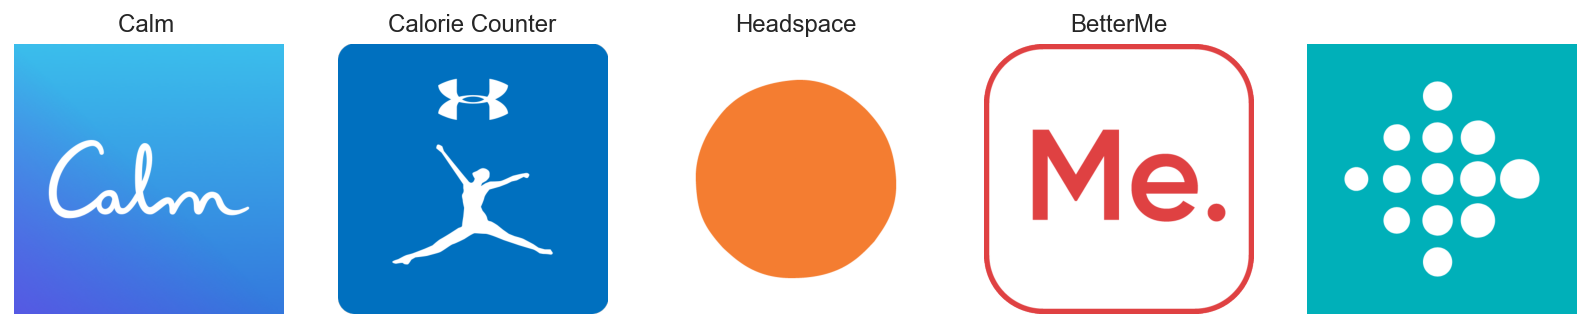

In [17]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
        return title[:15]
fig, axs = plt.subplots(1,5,figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

### Obtaining app reviews:

In [18]:
help(reviews)

Help on function reviews in module google_play_scraper.features.reviews:

reviews(app_id, lang=None, country=None, sort=None, count=None, filter_score_with=None, continuation_token=None)



In [19]:
#looking at top three most relevant reviews from calm and exploring the reviews function and learning...
calm, continuation_token = reviews('com.calm.android', lang='en', country='us',sort=Sort.MOST_RELEVANT, count=3)
calm

[{'reviewId': 'gp:AOqpTOFHTAQU4MK4zFR3nKvcr2UcPfsXLjzUnkM3GEWMmebUgAUlJvTLi1onT58ly7C1-S3PJxTzttJ75p6zew',
  'userName': 'Kylie',
  'userImage': 'https://lh3.googleusercontent.com/a-/AOh14GiYk0T_EWDm4Q4cLPYnliFLe-8GqyO1FHARHbgZ_Vw',
  'content': 'this app is really great other than the fact that so much of the content has to be paid for with a yearly subscription fee ($70). for example, you can only listen to the first day of (any) meditations for free; to listen to the rest of the days, you have to have that subscription i mentioned. there are zero free sleep stories. you can\'t listen to your "daily calm," unless you\'re subscribed as said before. the main thing that\'s free is music. please make more of the app accessible to more people.',
  'score': 3,
  'thumbsUpCount': 1020,
  'reviewCreatedVersion': '4.29',
  'at': datetime.datetime(2020, 7, 15, 5, 49, 42),
  'replyContent': None,
  'repliedAt': None},
 {'reviewId': 'gp:AOqpTOFGjU41kr589WJ-kx84Rbo26HEPQ5C1QRa2gDltojhNhFCfMRQhWhv

Resources for api usage: 
https://github.com/JoMingyu/google-play-scraper

better than this one: 
https://github.com/facundoolano/google-play-scraper#reviews


In [20]:
#iterating through each of the app packages to grab reviews on each grabbing 
#10K each based on relevance of review
results = []
for ap in tqdm(app_packages):
    result, continuation_token = reviews(
    ap,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT SQL-like calls
    count = 10000, # defaults to 100, returns number of records you want
    filter_score_with=None) # defaults to None(means all score) might be 
                            # usefull to scrape some more low scores if needed
    
    for a in result:
        a['application'] = ap #tracking which app we grabbed review of
        
    results.extend(result)

100%|██████████| 5/5 [04:20<00:00, 52.08s/it]


In [15]:
#making sure 10K of each app showed up:
len(results)

50000

In [16]:
#creating files to work from and .csv if needed
app_reviews_df = pd.DataFrame(results)
app_reviews_df.to_csv('app_reviews.csv', index=None, header=True)

## Data Description

|**Field**  | **Description**|
|--|--|
|ReviewId | a unique identifier for each review|
|userName  | Name of user that reviewed the product|
|userImage | User avatar
|content | The text supporting the stars assigned at the review|
|thumbsUpCount | count of how many other users appreciated the review (helps for relevance)|
|reviewCreatedVersion | The version of the app being reviewed|
|at | the review date
|replyContent | Text/content if there is a reply to a review from the app administrators|
|repliedAt | Timestamp for the replyContent field
|application| the app being reviewed


In [17]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application
0,gp:AOqpTOEtH7HaDAyL040EXcXI6-NkTLq5pFhVhAmuJPB...,Brogan Houston,https://lh3.googleusercontent.com/-We6TPXjnrQ8...,"I don't care about all the sleep stories, I ju...",1,835,4.29,2020-07-11 09:06:57,None,NaT,com.calm.android
1,gp:AOqpTOEy__Hsix8SgQW5-8djW2RqnS3Yfp9cTsJPk8G...,Aubrey Karim,https://lh3.googleusercontent.com/-_V1wVCSPVrw...,This app is great for sleep and for meditation...,4,338,4.29,2020-07-07 16:40:53,None,NaT,com.calm.android
2,gp:AOqpTOFuuTaHyzeTDn_OMc8aJdsIwGiQ2O7zB-f7I-u...,Glenneroo,https://lh3.googleusercontent.com/a-/AOh14GgIF...,Can't even try the app without creating a logi...,1,693,4.29,2020-07-07 19:32:31,None,NaT,com.calm.android
3,gp:AOqpTOEVrkdHF8x6kk7t7rESpoSzsk2yY3I5b19zS_P...,Nathan T.,https://lh3.googleusercontent.com/-_gIxpXuntNI...,Not sure why the low reviews. But this is a re...,5,304,4.29,2020-07-07 21:05:20,None,NaT,com.calm.android
4,gp:AOqpTOFHTAQU4MK4zFR3nKvcr2UcPfsXLjzUnkM3GEW...,Kylie O,https://lh3.googleusercontent.com/a-/AOh14Gjfn...,this app is really great other than the fact t...,3,523,4.29,2020-07-15 05:49:42,None,NaT,com.calm.android


# Scrub / Clean

In [18]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    45185 non-null object
at                      50000 non-null datetime64[ns]
replyContent            19188 non-null object
repliedAt               19188 non-null datetime64[ns]
application             50000 non-null object
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB


**Target value counts:**

In [19]:
app_reviews_df['score'].value_counts()

5    20233
1    14061
4     6676
3     4606
2     4424
Name: score, dtype: int64

>**Observation:** The intentional choice to select the most relevant reviews has paid off, it's good to see a mix of postive and negative reviews and not as imbalanced as in cases past.  :-P  Next up: A look into missing data.

### Missing Data:

In [20]:
import missingno as msno

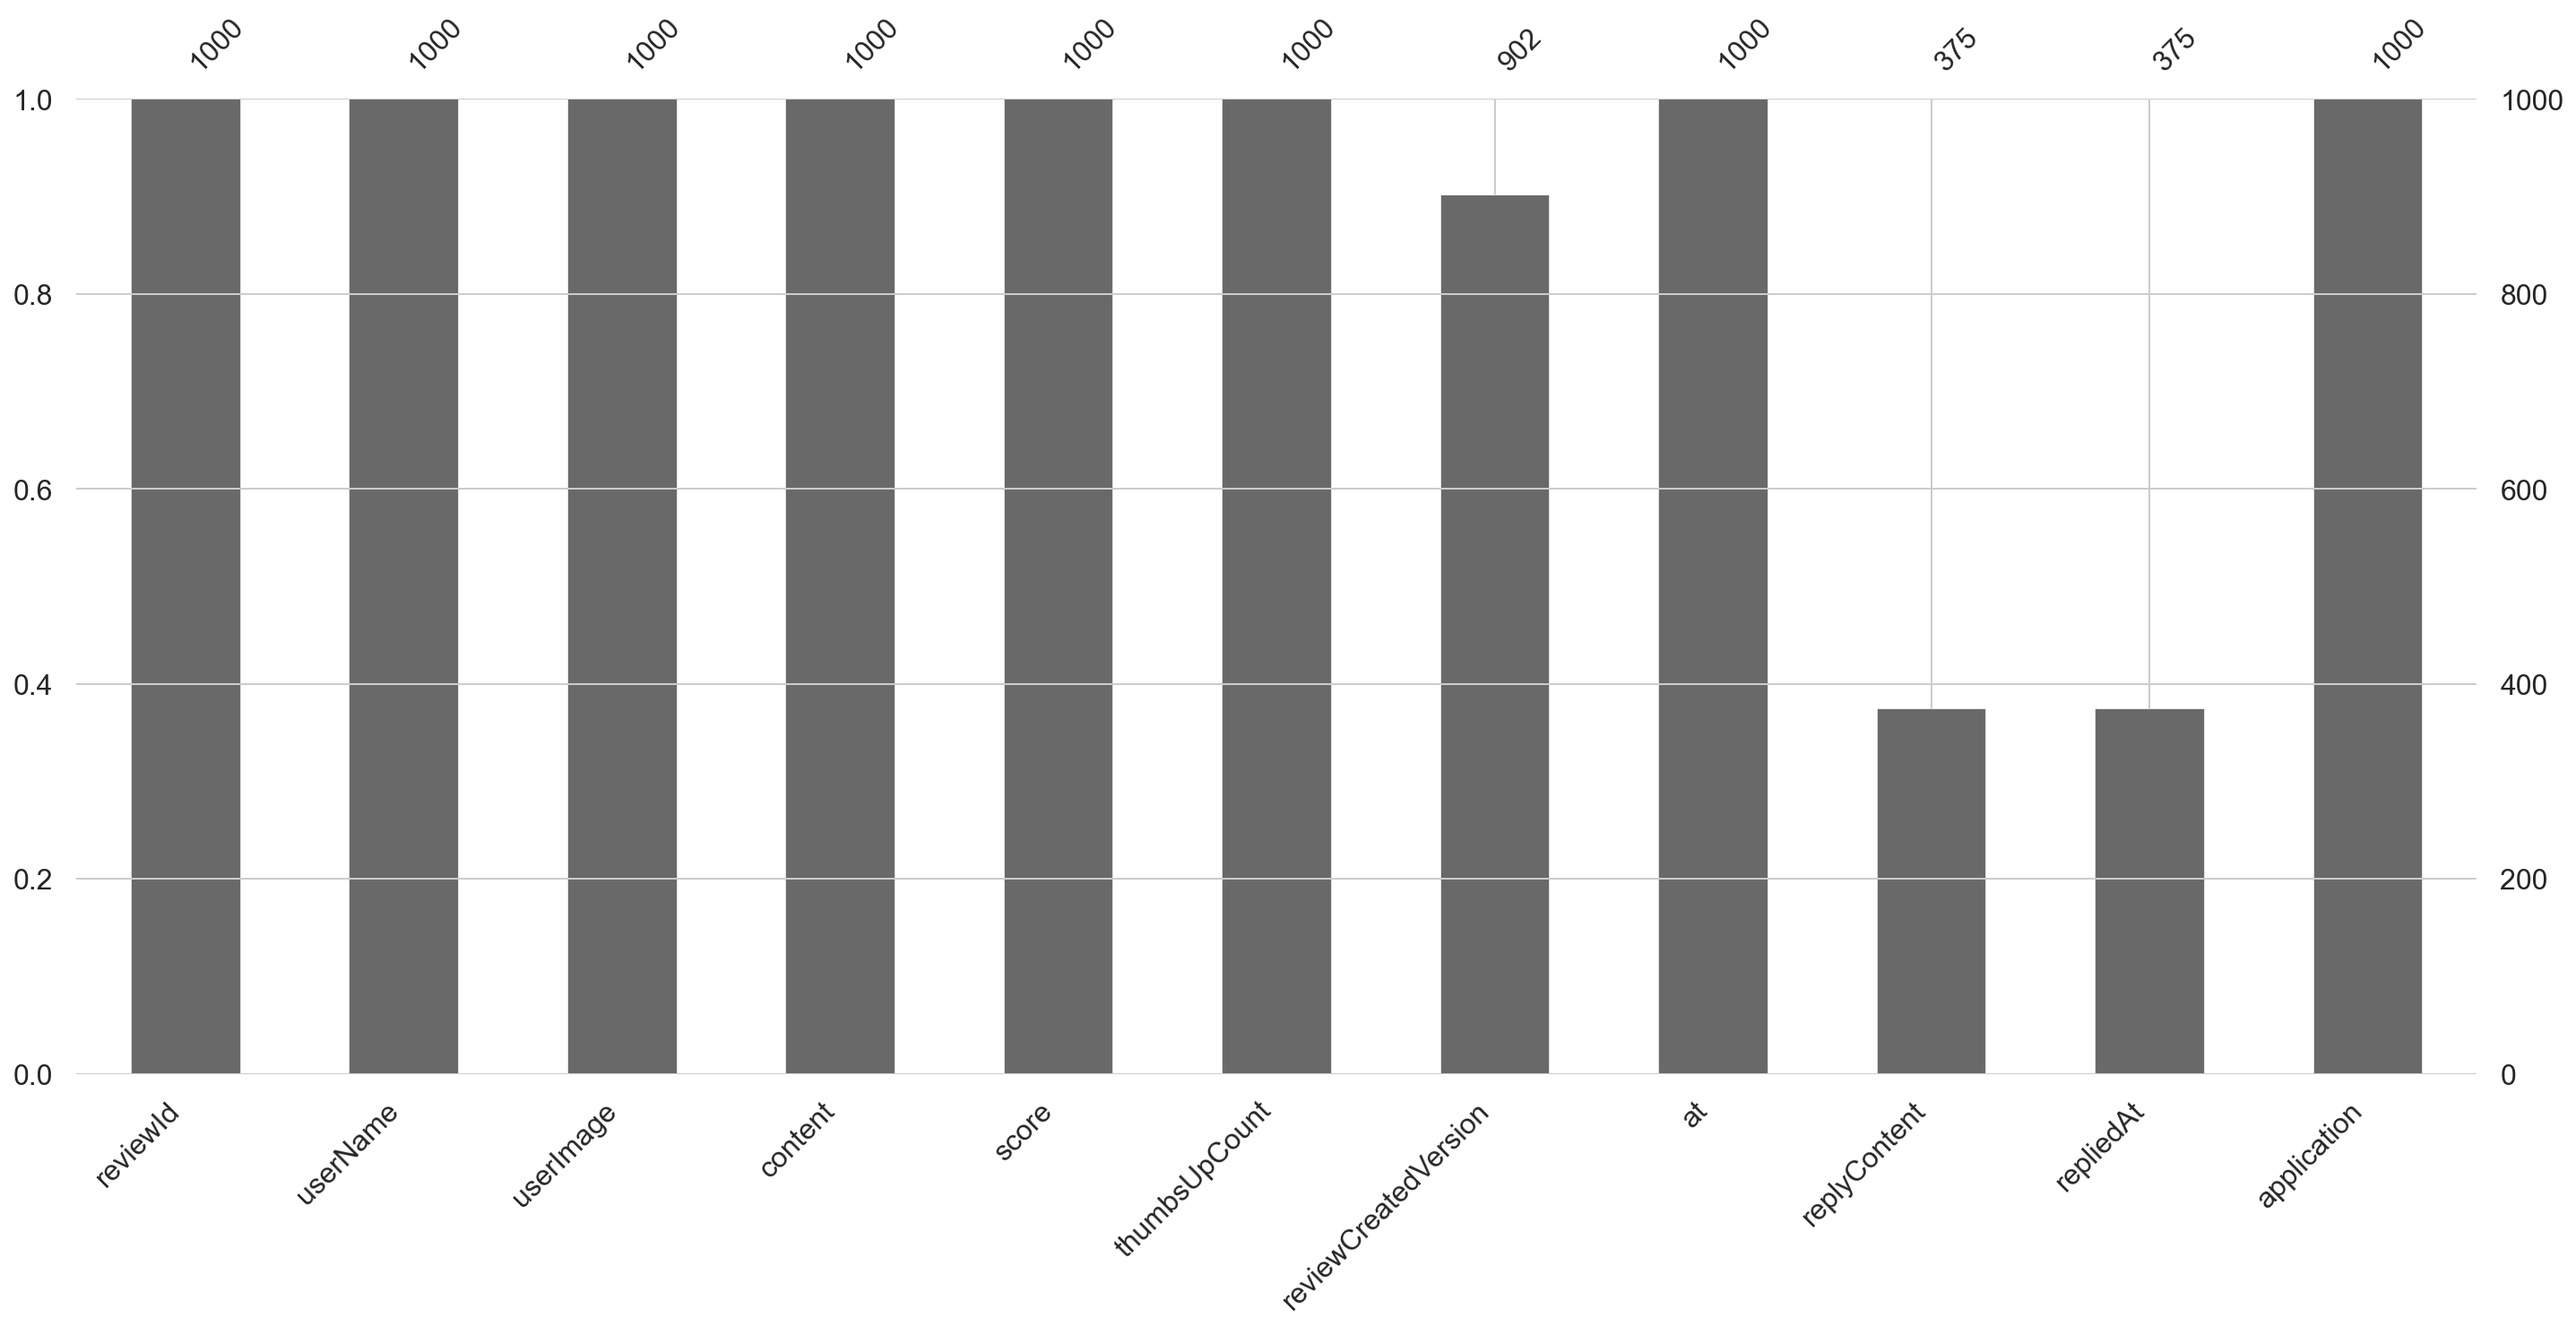

In [21]:
msno.bar(app_reviews_df.sample(1000))

In [22]:
#reviewCreatedVersion is almost 10% of the data... for now filling in with a '.' to keep the data numeric'
#and previewing the data to look for obvious patterns 
missingvers = app_reviews_df.loc[app_reviews_df['reviewCreatedVersion'].isna()]
missingvers.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application
3387,gp:AOqpTOE8Eb6zN0PndR2BzsNiX8Eom3fZsVgwjpRZ9kd...,Brazil Uluwita,https://lh3.googleusercontent.com/a-/AOh14GiiV...,I downloaded this application and immediately ...,1,0,None,2020-07-09 08:59:47,None,NaT,com.calm.android
3389,gp:AOqpTOHEb71QUbBxe0QmLcjs_gmyx-AHpzDGWY9Rgdq...,Alex Fixler,https://lh3.googleusercontent.com/-UYuiwOsZ48Q...,"The ""How to Meditate"" 30 day course is really ...",3,1,None,2020-07-28 21:45:49,None,NaT,com.calm.android
3412,gp:AOqpTOFiiAJsuJAwIPAnjmcsDZMPHCeUiPPVPZWUtYK...,clary !,https://lh3.googleusercontent.com/a-/AOh14GjY-...,"it's really not that bad, it's just that, some...",4,2,None,2020-07-08 18:49:47,None,NaT,com.calm.android
3419,gp:AOqpTOGlFq9L0PJmg_CoQ_ND0F25hfPCHzGAP4jUVdS...,Momeari Katoka,https://lh3.googleusercontent.com/-NhSiF1KaL70...,Had a free trial for a month (used the app twi...,1,2,None,2020-07-28 23:27:49,None,NaT,com.calm.android
3429,gp:AOqpTOGyZ_I-zJbSnWvZr7NvrCP0vRErh9htOUfiJRm...,ッGirls,https://lh3.googleusercontent.com/a-/AOh14GjHc...,"This app is PERFECT. And yes, I'm a 9 year old...",4,0,None,2020-07-02 21:17:50,None,NaT,com.calm.android


In [23]:
app_reviews_df['reviewCreatedVersion'].fillna('.', inplace=True)

In [24]:
#creating a field to indicate whether or not someone replied to a review
app_reviews_df['replied'] = app_reviews_df['replyContent'].notnull()
app_reviews_df['replied'].value_counts(normalize=True)

False    0.61624
True     0.38376
Name: replied, dtype: float64

In [25]:
app_reviews_df['replyContent'].fillna('n/a', inplace=True)
app_reviews_df['repliedAt'].fillna('_', inplace=True)

In [26]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(8)
memory usage: 4.2+ MB


### Dropping columns: 

In [27]:
#there are no reviewIds that are duplicated, see no value in this content
#it's easier to index of of other numbers for slicing, so dropping this feature:
app_reviews_df['reviewId'].duplicated().value_counts()

False    50000
Name: reviewId, dtype: int64

In [28]:
app_reviews_df.drop('reviewId', axis=1, inplace=True)

In [29]:
app_reviews_df['userImage'][8]
#not focus of this project so dropping images
app_reviews_df.drop('userImage', axis=1, inplace=True)

In [30]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
userName                50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 3.5+ MB


In [1]:
app_reviews_df.to_csv('app_reviews_clean', index=None, header=True)

NameError: name 'app_reviews_df' is not defined